In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime operations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

1-ny-taxi-data-exploration-and-visualization.ipynb
fare_data.csv
input
nb-analysis.ipynb
ny-predict-taxi-demand-Boosted-Decision-tree.ipynb
ny-predict-taxi-demand-Linear-Regression-3-lag.ipynb
ny-predict-taxi-demand-Linear-Regression-full.ipynb
ny-predict-taxi-demand-Random-Forest.ipynb
ny-predict-taxi-demand-baseline.ipynb
ny-predict-taxi-demand.ipynb
trip_data.csv



In [23]:
# Load trip data csv
df_trip = pd.read_csv('input/trip_data.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])
print(df_trip.shape)
df_trip.head()
print(df_trip.vendor_id.unique())


(13059961, 14)
['CMT' 'VTS']


In [24]:
# Load fare data csv
df_fare = pd.read_csv('input/fare_data.csv', parse_dates=[' pickup_datetime'])
df_fare = df_fare.rename(columns=lambda x: x.strip())
print(df_fare.shape)

(13059961, 11)


In [25]:
# Check data for null values
df_trip.isnull().values.any()
df_trip.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    6204694
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude         209
dropoff_latitude          209
dtype: int64

In [26]:
# Check data for null values
df_fare.isnull().values.any()

False

In [27]:
# Drop column store_and_fwd_flag
#df_trip = df_trip.drop('store_and_fwd_flag', 1)

In [28]:
df_trip_null = df_trip[df_trip.isnull().any(axis=1)]
print(df_trip_null.shape)

(6204694, 14)


In [29]:
#df_trip = df_trip.dropna()
#df_trip.isnull().sum()
#df_trip.head()

In [30]:
df_total = pd.merge(df_trip, df_fare, how='inner', on=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'])
print(df_total.shape)

(13060361, 21)


In [31]:
df_total.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,001DFAC01BC0A32F48C3769DD1414778,5A677E8D42137D0006944AF0E4D4488C,CMT,1,N,2013-01-19 12:37:55,2013-01-19 12:51:26,3,810,3.1,...,40.736645,-73.957756,40.768227,CRD,12.5,0.0,0.5,1.50,0.0,14.50
1,001DFAC01BC0A32F48C3769DD1414778,EB99F192B7EA48BE077EE152BB630A4E,CMT,1,N,2013-01-18 15:16:11,2013-01-18 15:32:51,1,1000,2.6,...,40.762726,-73.976303,40.788666,CRD,13.0,0.0,0.5,2.70,0.0,16.20
2,001DFAC01BC0A32F48C3769DD1414778,EB99F192B7EA48BE077EE152BB630A4E,CMT,5,N,2013-01-18 15:34:56,2013-01-18 16:21:18,1,2782,18.3,...,40.791367,-74.184647,40.692551,CRD,69.0,0.0,0.0,13.80,0.0,82.80
3,001DFAC01BC0A32F48C3769DD1414778,AAB8A9FBE9CF2DDCB146CC6EFEDD772F,CMT,5,N,2013-01-18 23:06:21,2013-01-18 23:26:43,1,1221,5.1,...,40.738934,-74.035683,40.716774,CRD,55.0,0.0,0.0,11.00,0.0,66.00
4,001DFAC01BC0A32F48C3769DD1414778,AAB8A9FBE9CF2DDCB146CC6EFEDD772F,CMT,1,N,2013-01-18 22:18:20,2013-01-18 22:32:08,1,828,3.4,...,40.771252,-73.955116,40.741486,CRD,13.5,0.5,0.5,5.08,0.0,19.58


# Exploratory Analysis and Data Visualization

## 1) Dataset Statistics

In [32]:
df_total.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306015e+07,1.306015e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07,1.306036e+07
mean,1.033220e+00,1.696640e+00,8.322260e+02,4.181298e+00,-7.222963e+01,3.962966e+01,-7.219249e+01,3.960959e+01,1.226385e+01,3.193224e-01,4.982293e-01,1.353433e+00,2.412236e-01,1.467621e+01
std,3.375513e-01,1.360185e+00,1.875924e+04,2.861421e+03,1.191197e+01,8.730145e+00,1.201364e+01,8.719535e+00,9.952378e+00,4.687490e-01,3.865723e-02,2.164904e+00,1.180412e+00,1.194570e+01
min,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-2.238993e+03,-3.547921e+03,-2.238993e+03,-3.547921e+03,-6.484200e+02,-1.000000e+00,-5.000000e-01,-2.500000e+00,-1.300000e+01,-1.605000e+02
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399219e+01,4.073444e+01,-7.399145e+01,4.073342e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.790000e+00,-7.398183e+01,4.075230e+01,-7.398018e+01,4.075273e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396679e+01,4.076690e+01,-7.396336e+01,4.076779e+01,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01
max,2.100000e+02,9.000000e+00,4.294948e+06,8.810002e+06,1.631880e+02,2.354863e+03,1.719383e+02,2.342817e+03,1.005200e+03,6.333400e+02,8.005000e+01,3.167700e+02,3.353300e+02,1.698500e+03


## 2) Pickup Location and Dropoff Location

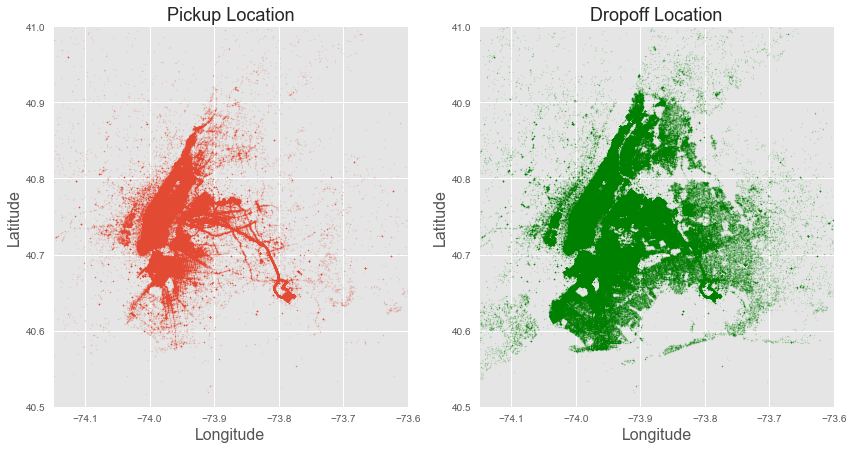

In [33]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
ax1.scatter(df_trip.pickup_longitude,df_trip.pickup_latitude,s=1,alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax2 = fig.add_subplot(122)
ax2.scatter(df_trip.dropoff_longitude,df_trip.dropoff_latitude,s=1,color='green',alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

## 3) Histogram of distance travelled

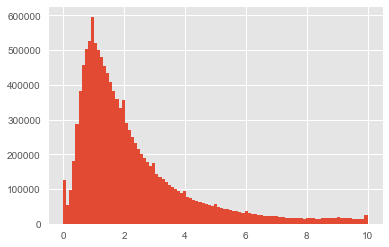

In [34]:
df_total.trip_distance.hist(bins=np.linspace(0., 10., 100))

## 4) Vendor ID

             index
vendor_id         
CMT        6857383
VTS        6202578


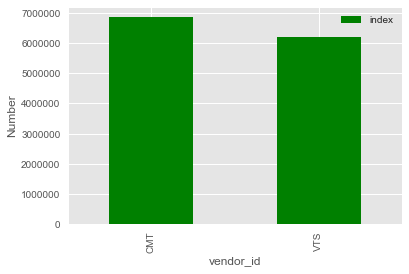

In [35]:
df_trip_indexed = df_trip.reset_index()
print(pd.DataFrame(df_trip_indexed.groupby(['vendor_id']).count()['index']))
pd.DataFrame(df_trip_indexed.groupby(['vendor_id']).count()['index']).plot(kind='bar',color='green')
plt.ylabel('Number')

## 5) Passenger count

                   index
passenger_count         
0                    319
1                9229059
2                1781077
3                 554217
4                 264022
5                 739568
6                 491695
7                      1
8                      1
9                      2


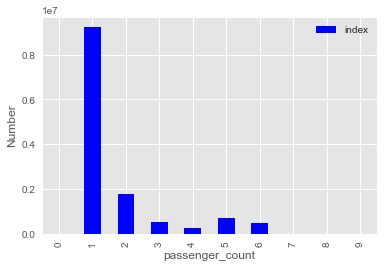

In [36]:
print(pd.DataFrame(df_trip_indexed.groupby(['passenger_count']).count()['index']))
pd.DataFrame(df_trip_indexed.groupby(['passenger_count']).count()['index']).plot(kind='bar',color='blue')
plt.ylabel('Number')

## 7) Trip Duration

In [55]:
df_total_indexed = df_total.reset_index()
#print(pd.DataFrame(df_total_indexed.groupby(['trip_time_in_secs']).count()['index']))

# Trip duration equal to zero
print("Short trips:", df_total_indexed[df_total_indexed.trip_time_in_secs < 10].shape)

# Less than zero trip duration
print("Less than zero:", df_total_indexed[df_total_indexed.trip_time_in_secs < 0].shape)

# Trip duration equal to zero
print("Equal to zero:", df_total_indexed[df_total_indexed.trip_time_in_secs == 0].shape)

# Trip duration greater than 10 hours
print("Long trips:", df_total_indexed[df_total_indexed.trip_time_in_secs > 36000].shape)

Short trips: (47406, 22)
Less than zero: (100, 22)
Equal to zero: (33946, 22)
Long trips: (250, 22)


#### Duration less that zero and trips greater than 10 hours (with less fare) are invalid data, short trips may be due to passenger cancelling the ride soon it starts.

## Trips per month, per week, per day, per hour

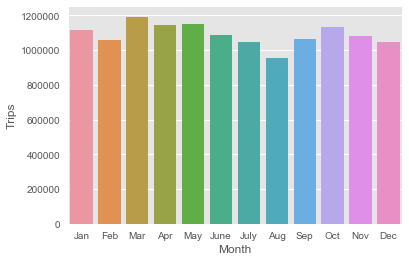

In [37]:
# Trips per month
plt.figure(figsize=(6,4))
ax = sns.countplot(df_trip.pickup_datetime.dt.month)
ax.set(xlabel='Month', ylabel='Trips', xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

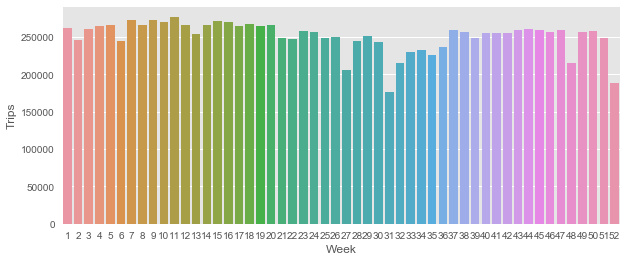

In [38]:
# Trips per week
plt.figure(figsize=(10,4))
ax = sns.countplot(df_trip.pickup_datetime.dt.week)
ax.set(xlabel='Week', ylabel='Trips')
plt.show()

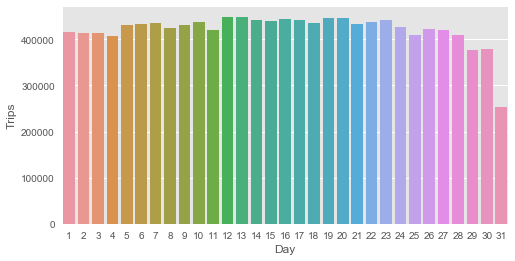

In [39]:
# Trips per day
plt.figure(figsize=(8,4))
ax = sns.countplot(df_trip.pickup_datetime.dt.day)
ax.set(xlabel='Day', ylabel='Trips')
plt.show()

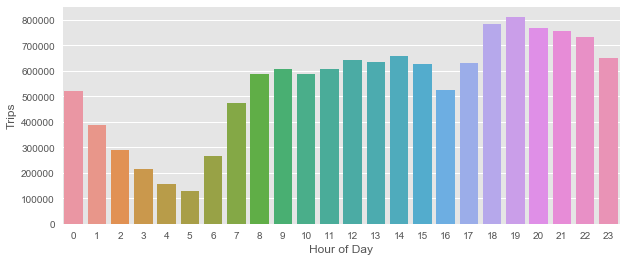

In [40]:
# Trips per hour
plt.figure(figsize=(10,4))
ax = sns.countplot(df_trip.pickup_datetime.dt.hour)
ax.set(xlabel='Hour of Day', ylabel='Trips')
plt.show()

#### OBSERVATION: Number of trips is maximum in the evening. This is due to office hours. 

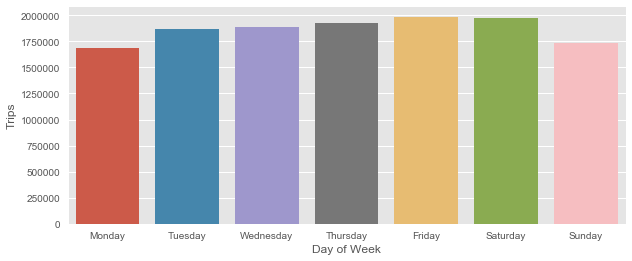

In [41]:
# Trips per week-day
df_trip['day_of_week'] = df_trip['pickup_datetime'].dt.weekday_name
plt.figure(figsize=(10,4))
ax = sns.countplot(df_trip.day_of_week, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set(xlabel='Day of Week', ylabel='Trips')
plt.show()

#### OBSERVATION: Number of trips increases during weekend

## 6) Trip Data Correlation function

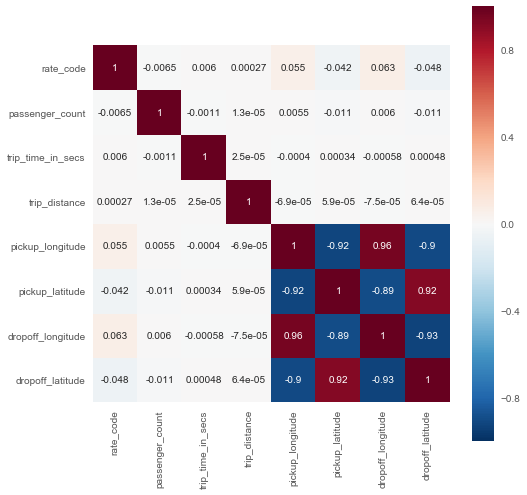

In [42]:
numtrain = df_trip.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=1,square=True,annot=True)

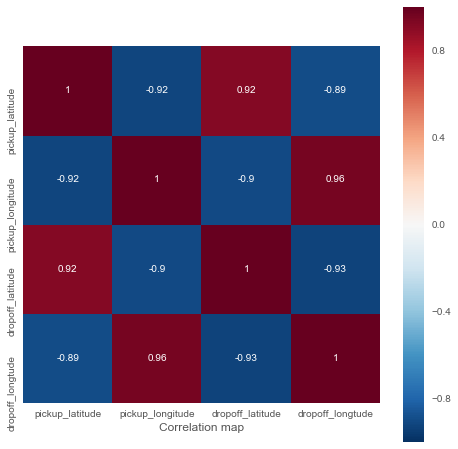

In [43]:
# zooming in on location points correlation
loc_frame = pd.DataFrame()
loc_frame['pickup_latitude'] = df_trip['pickup_latitude']
loc_frame['pickup_longitude'] = df_trip['pickup_longitude']
loc_frame['dropoff_latitude'] = df_trip['dropoff_latitude']
loc_frame['dropoff_longtude'] = df_trip['dropoff_longitude']
numtrain = loc_frame.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr,vmax=1,square=True,annot=True)
ax.set(xlabel='Correlation map')

#### OBSERVATION: In dataset, DROP-OFF location(dropoff_lattitde, dropoff_longitude) and  PICK-UP (pickup_lattitde, pick_longitude) are highly co-related. This is understandable as drivers pick up next passenger immdiately they drop current one.


In [44]:
#short trip vs money
df_total.shape

(13060361, 21)